**Generative AI**

**1. Natural language generation**

**2. Image generation**

**3. Code generation**


**Large language models (LLMs)**

1. Determining sentiment or otherwise classifying natural language text.
2. Summarizing text.
3. Comparing multiple text sources for semantic similarity.
4. Generating new natural language.

**Transformer models**
1. An encoder block that creates semantic representations of the training vocabulary.
2. A decoder block that generates new language sequences.

**Tokenization**

Hi, hello how are you?
Hi, (1)  
hello (2)
how (3)
are (4)
you? (5)

**Embeddings**

hello (2)

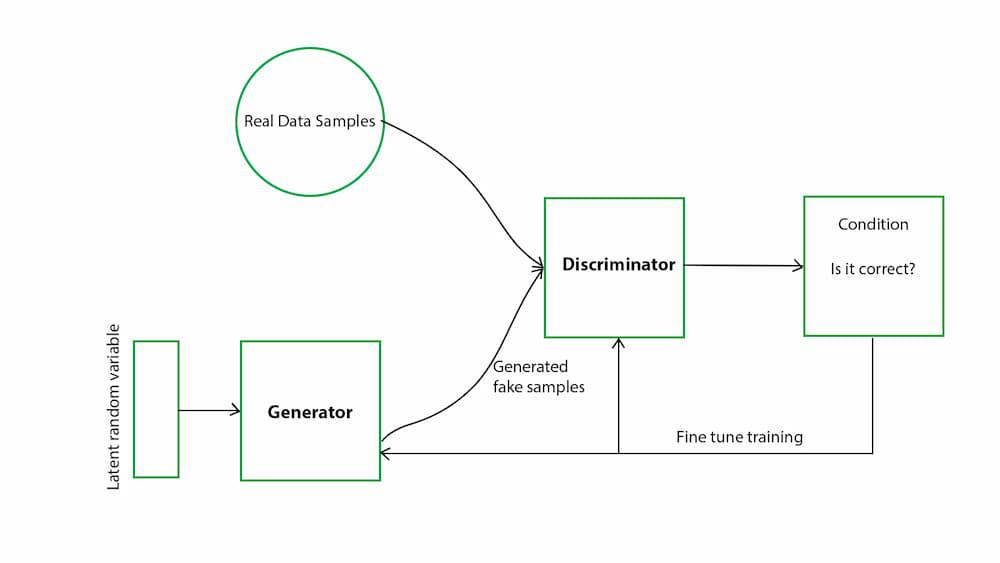

**Discriminative**

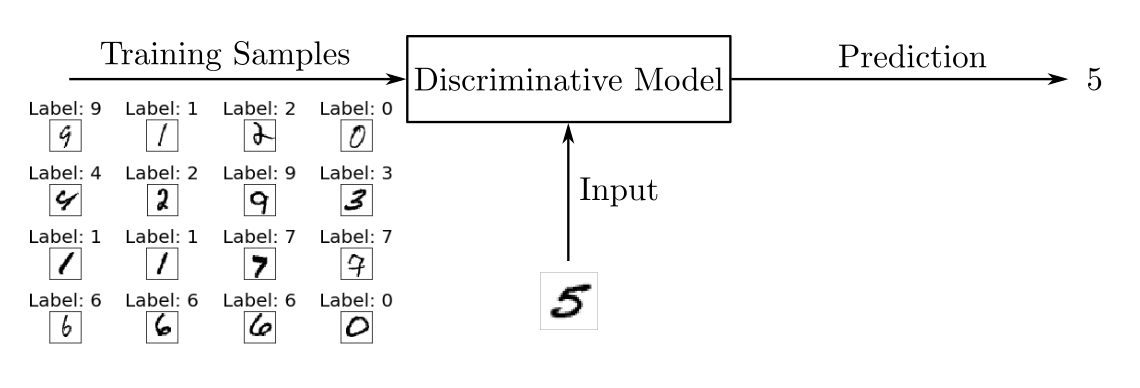

**Generative**

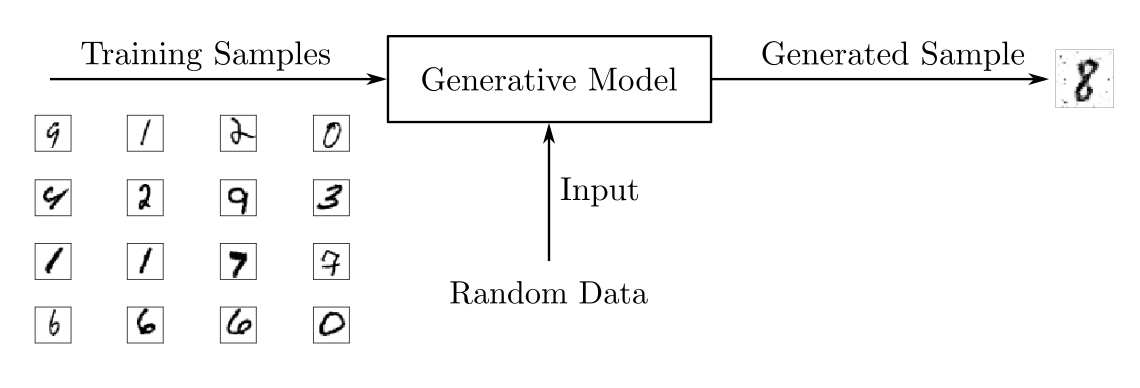

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

**Preparing the Training Data**

x₁, x₂

x1 - 0 to 2π  - index value  = 0

X2 - sin(x1) - index value  = 1

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

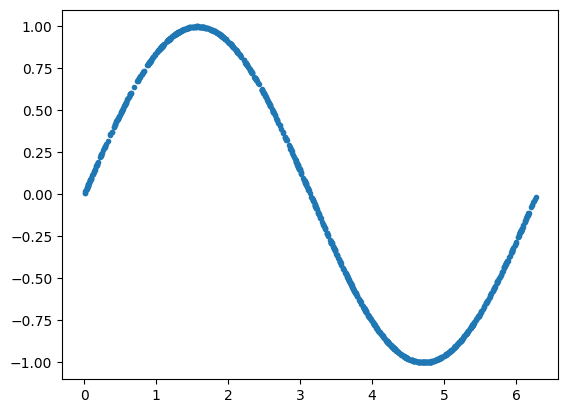

In [5]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

**Implementing the Discriminator**

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

__init__()  - build the model
super().__init__()  - from nn.Module
nn.Sequential() - NN sequential way  

Lines 5 and 6:The input is two-dimensional, and the first hidden layer is composed of 256 neurons with ReLU activation.

Lines 8, 9, 11, and 12: The second and third hidden layers are composed of 128 and 64 neurons, respectively, with ReLU activation.

Lines 14 and 15: The output is composed of a single neuron with sigmoidal activation to represent a probability.

Lines 7, 10, and 13: After the first, second, and third hidden layers, you use dropout to avoid overfitting.

In [8]:
discriminator = Discriminator()

**Implementing the Generator**

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

two hidden layers with 16 and 32 neurons, both with ReLU activation, and a linear activation layer with 2 neurons in the output.

**Training the Models**

In [11]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

Line 1 sets the learning rate (lr), which you’ll use to adapt the network weights.

Line 2 sets the number of epochs (num_epochs), which defines how many repetitions of training using the whole training set will be performed.

Line 3 assigns the variable loss_function to the binary cross-entropy function BCELoss(), which is the loss function that you’ll use to train the models.

In [12]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [15]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.0867772325873375
Epoch: 0 Loss G.: 2.3683221340179443
Epoch: 10 Loss D.: 0.6525241136550903
Epoch: 10 Loss G.: 0.9418174028396606
Epoch: 20 Loss D.: 0.6395315527915955
Epoch: 20 Loss G.: 0.8174182772636414
Epoch: 30 Loss D.: 0.8120390772819519
Epoch: 30 Loss G.: 0.9551755785942078
Epoch: 40 Loss D.: 0.6731955409049988
Epoch: 40 Loss G.: 1.0638225078582764
Epoch: 50 Loss D.: 0.5839334726333618
Epoch: 50 Loss G.: 0.8923593759536743
Epoch: 60 Loss D.: 0.6466270089149475
Epoch: 60 Loss G.: 0.7786716222763062
Epoch: 70 Loss D.: 0.6099444031715393
Epoch: 70 Loss G.: 0.9715758562088013
Epoch: 80 Loss D.: 0.6663532853126526
Epoch: 80 Loss G.: 0.7661280632019043
Epoch: 90 Loss D.: 0.6767003536224365
Epoch: 90 Loss G.: 0.8156576752662659
Epoch: 100 Loss D.: 0.6646845936775208
Epoch: 100 Loss G.: 0.649344801902771
Epoch: 110 Loss D.: 0.6587421894073486
Epoch: 110 Loss G.: 0.7870831489562988
Epoch: 120 Loss D.: 0.7156546115875244
Epoch: 120 Loss G.: 0.6199342012405396
Epoch: 13

Line 2: You get the real samples of the current batch from the data loader and assign them to real_samples. Notice that the first dimension of the tensor has the number of elements equal to batch_size. This is the standard way of organizing data in PyTorch, with each line of the tensor representing one sample from the batch.

Line 4: You use torch.ones() to create labels with the value 1 for the real samples, and then you assign the labels to real_samples_labels.

Lines 5 and 6: You create the generated samples by storing random data in latent_space_samples, which you then feed to the generator to obtain generated_samples.

Line 7: You use torch.zeros() to assign the value 0 to the labels for the generated samples, and then you store the labels in generated_samples_labels.

Lines 8 to 11: You concatenate the real and generated samples and labels and store them in all_samples and all_samples_labels, which you’ll use to train the discriminator.

Next, in lines 14 to 19, you train the discriminator:

Line 14: In PyTorch, it’s necessary to clear the gradients at each training step to avoid accumulating them. You do this using .zero_grad().


Line 15: You calculate the output of the discriminator using the training data in all_samples.

Line 15: You calculate the output of the discriminator using the training data in all_samples.

Line 18: You calculate the gradients to update the weights with loss_discriminator.backward().

Line 19: You update the discriminator weights by calling optimizer_discriminator.step().

Next, in line 22, you prepare the data to train the generator. You store random data in latent_space_samples, with a number of lines equal to batch_size. You use two columns since you’re providing two-dimensional data as input to the generator.

You train the generator in lines 25 to 32:

Line 25: You clear the gradients with .zero_grad().

Line 26: You feed the generator with latent_space_samples and store its output in generated_samples.

Line 27: You feed the generator’s output into the discriminator and store its output in output_discriminator_generated, which you’ll use as the output of the whole model.


Lines 28 to 30: You calculate the loss function using the output of the classification system stored in output_discriminator_generated and the labels in real_samples_labels, which are all equal to 1.


Lines 31 and 32: You calculate the gradients and update the generator weights. Remember that when you trained the generator, you kept the discriminator weights frozen since you created optimizer_generator with its first argument equal to generator.parameters().

lines 35 to 37, you display the values of the discriminator and generator loss functions at the end of each ten epochs.


In [16]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

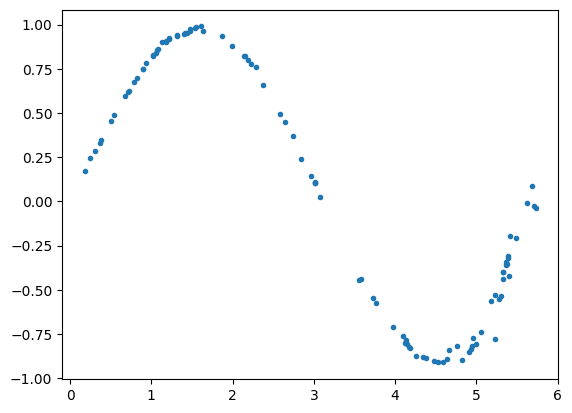

In [17]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")